In [2]:
#This block to load all libraries needed
library("DEXSeq")
library("tidyr")
library("qvalue")
library("edgeR")
library("dplyr")
library("reshape2")
library("EnhancedVolcano")
library("sva")
library("Rtsne")
library("ggplot2")
library("pheatmap")
library("org.Hs.eg.db")
library("circlize")
library("readr")

Loading required package: BiocParallel

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required packa

ERROR: Error in as.vector(labels): argument "labels" is missing, with no default


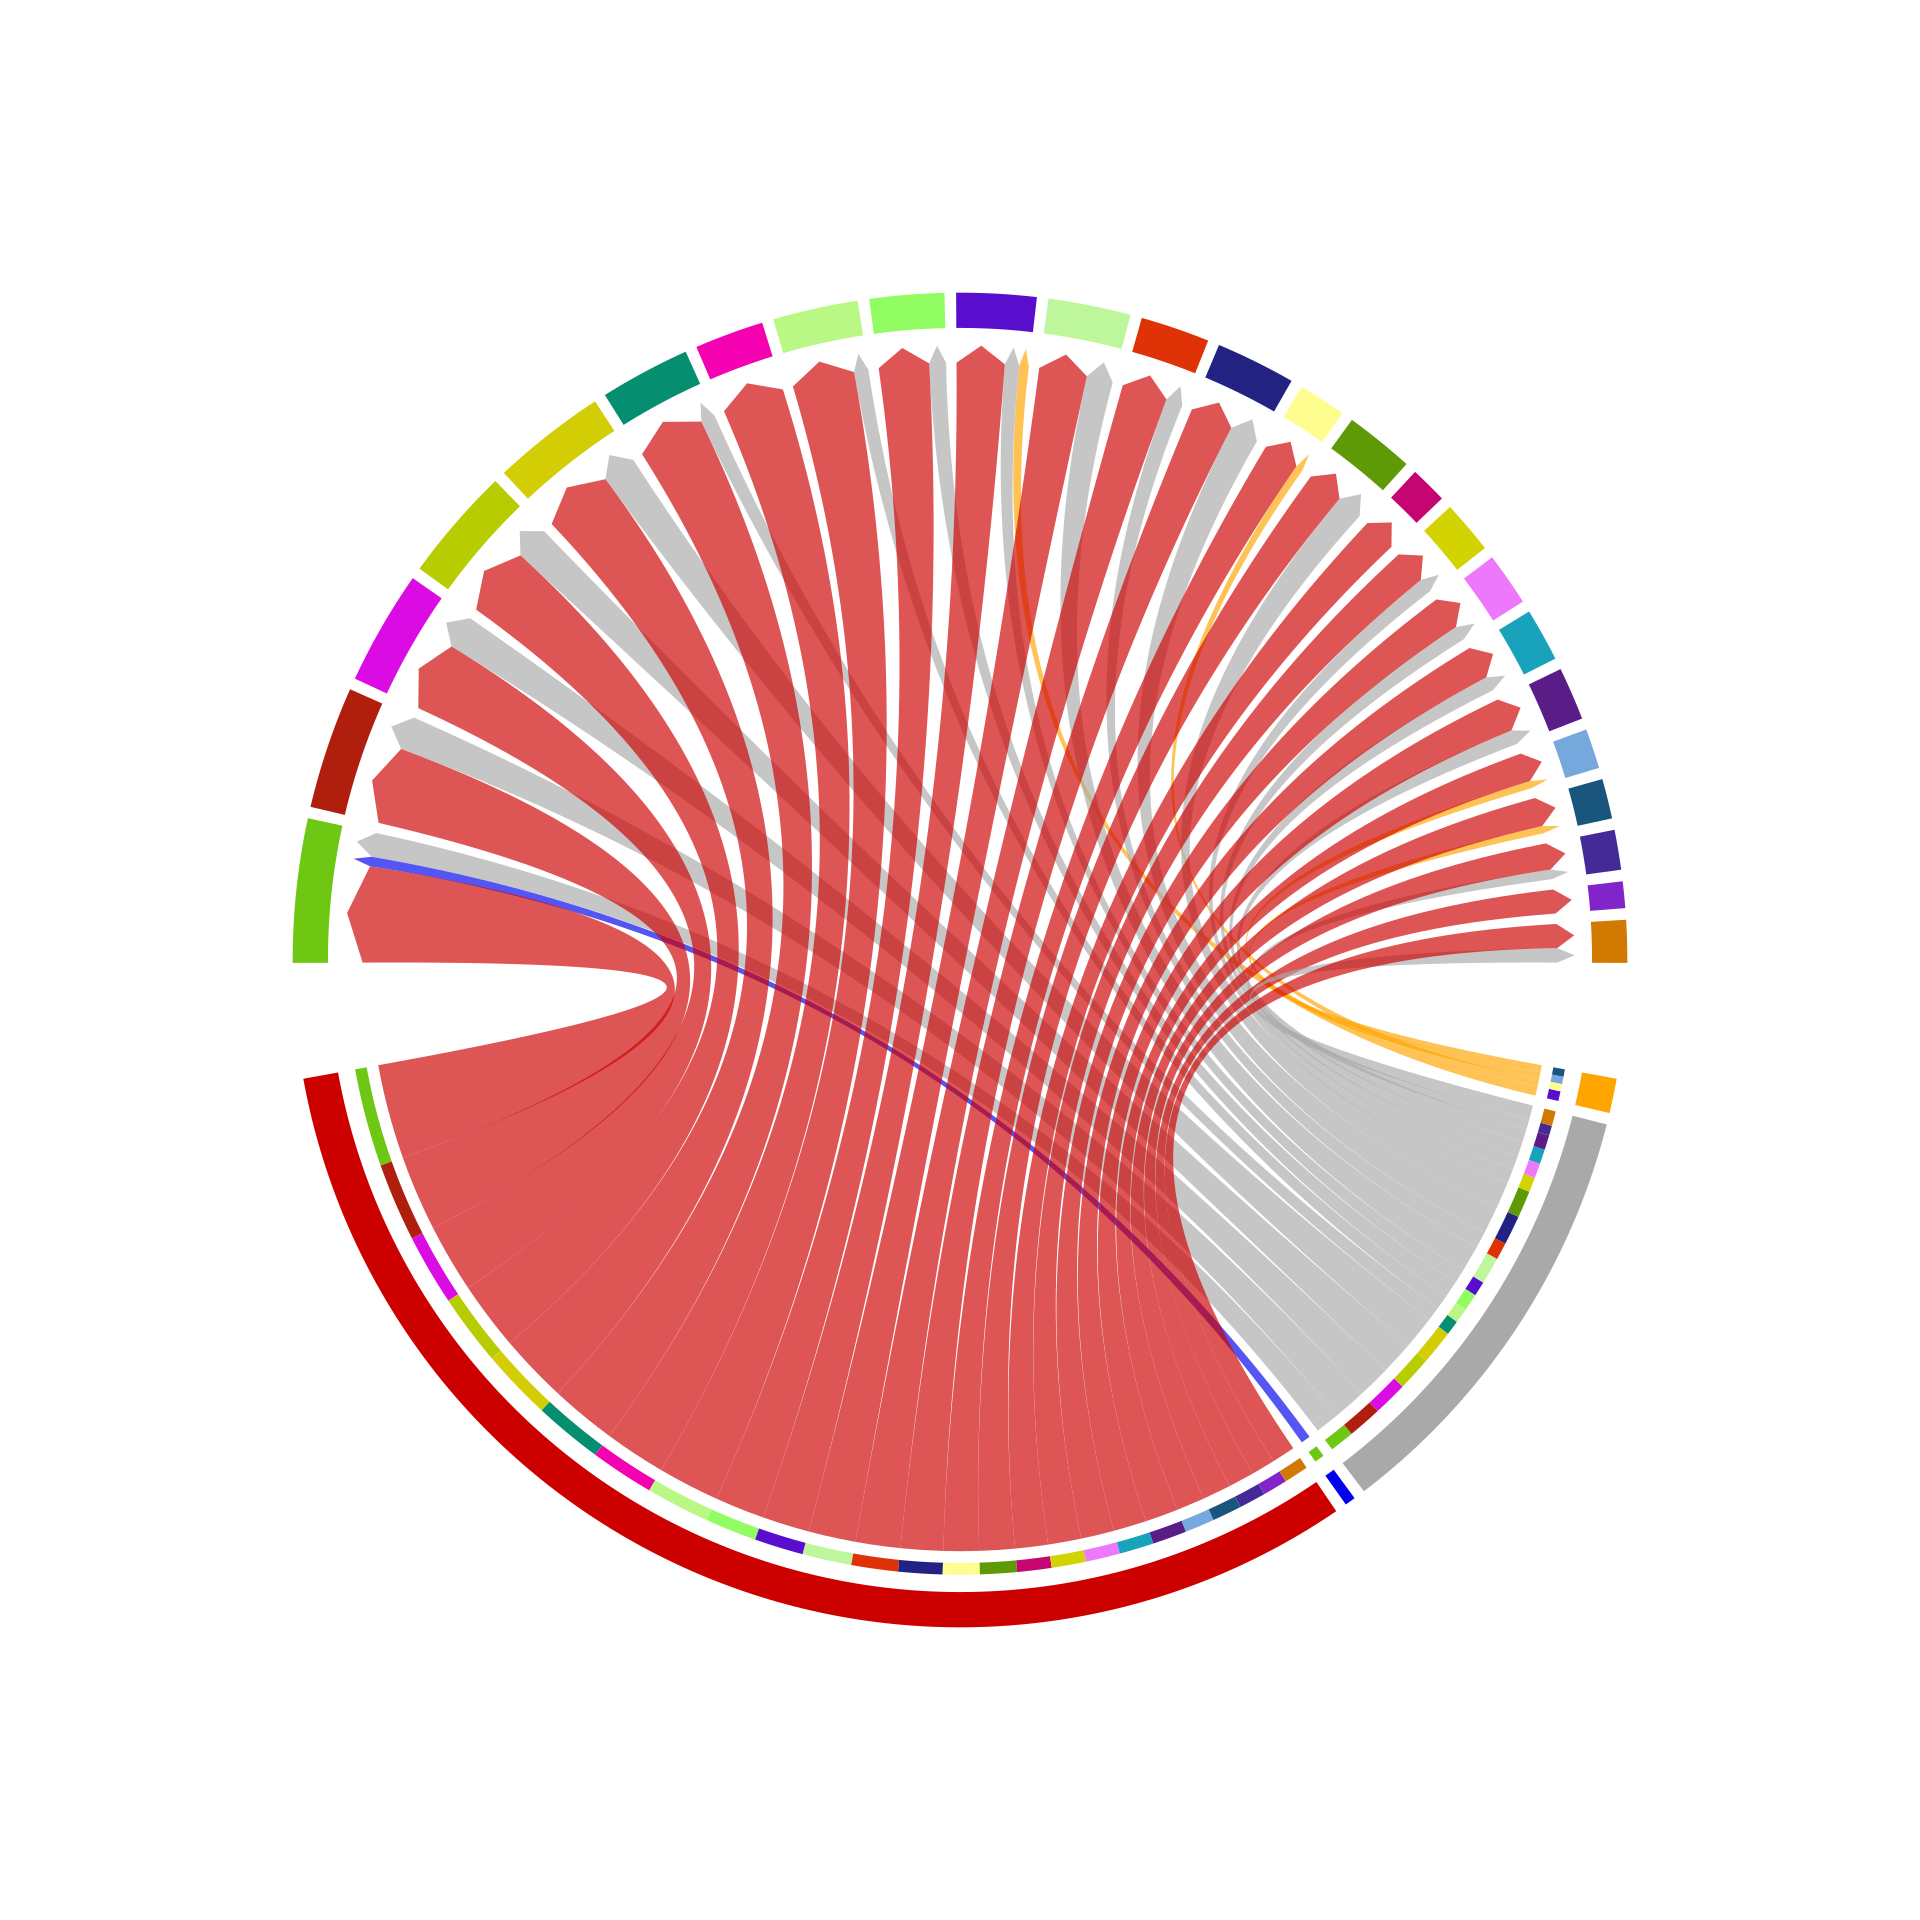

In [11]:
#Circos2 - EVs
options(repr.plot.width =16, repr.plot.height =16)
chord <- read.csv("EV_chord_top_25.csv")
chord_proc <- chord[,1:4]
rownames(chord_proc) <- chord$Pathways
grid.col = c(ExCy="red3", Fujifilm="darkgray", UC="blue2", ExoEasy="orange")



chordDiagram(as.matrix(t(chord_proc)), annotationTrack = "grid", 
             preAllocateTracks = list(list(track.width = 0.65, track.height=0.2)), 
             grid.col = grid.col,
             transparency=0.33,
             directional = 1, 
             direction.type = c("diffHeight", "arrows"), 
             link.arr.type = "big.arrow",)

circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(
              ylim[1] + cm_h(1),
              sector.name, 
              facing = "clockwise",
              niceFacing = TRUE, 
              adj = c(0.0, 0.5),
              cex = 1.5,
              col=grid.col[sector.name],
              font = 1)
  circos.axis(major.tick=FALSE, lwd=0, labels=FALSE)
}, bg.border = NA)

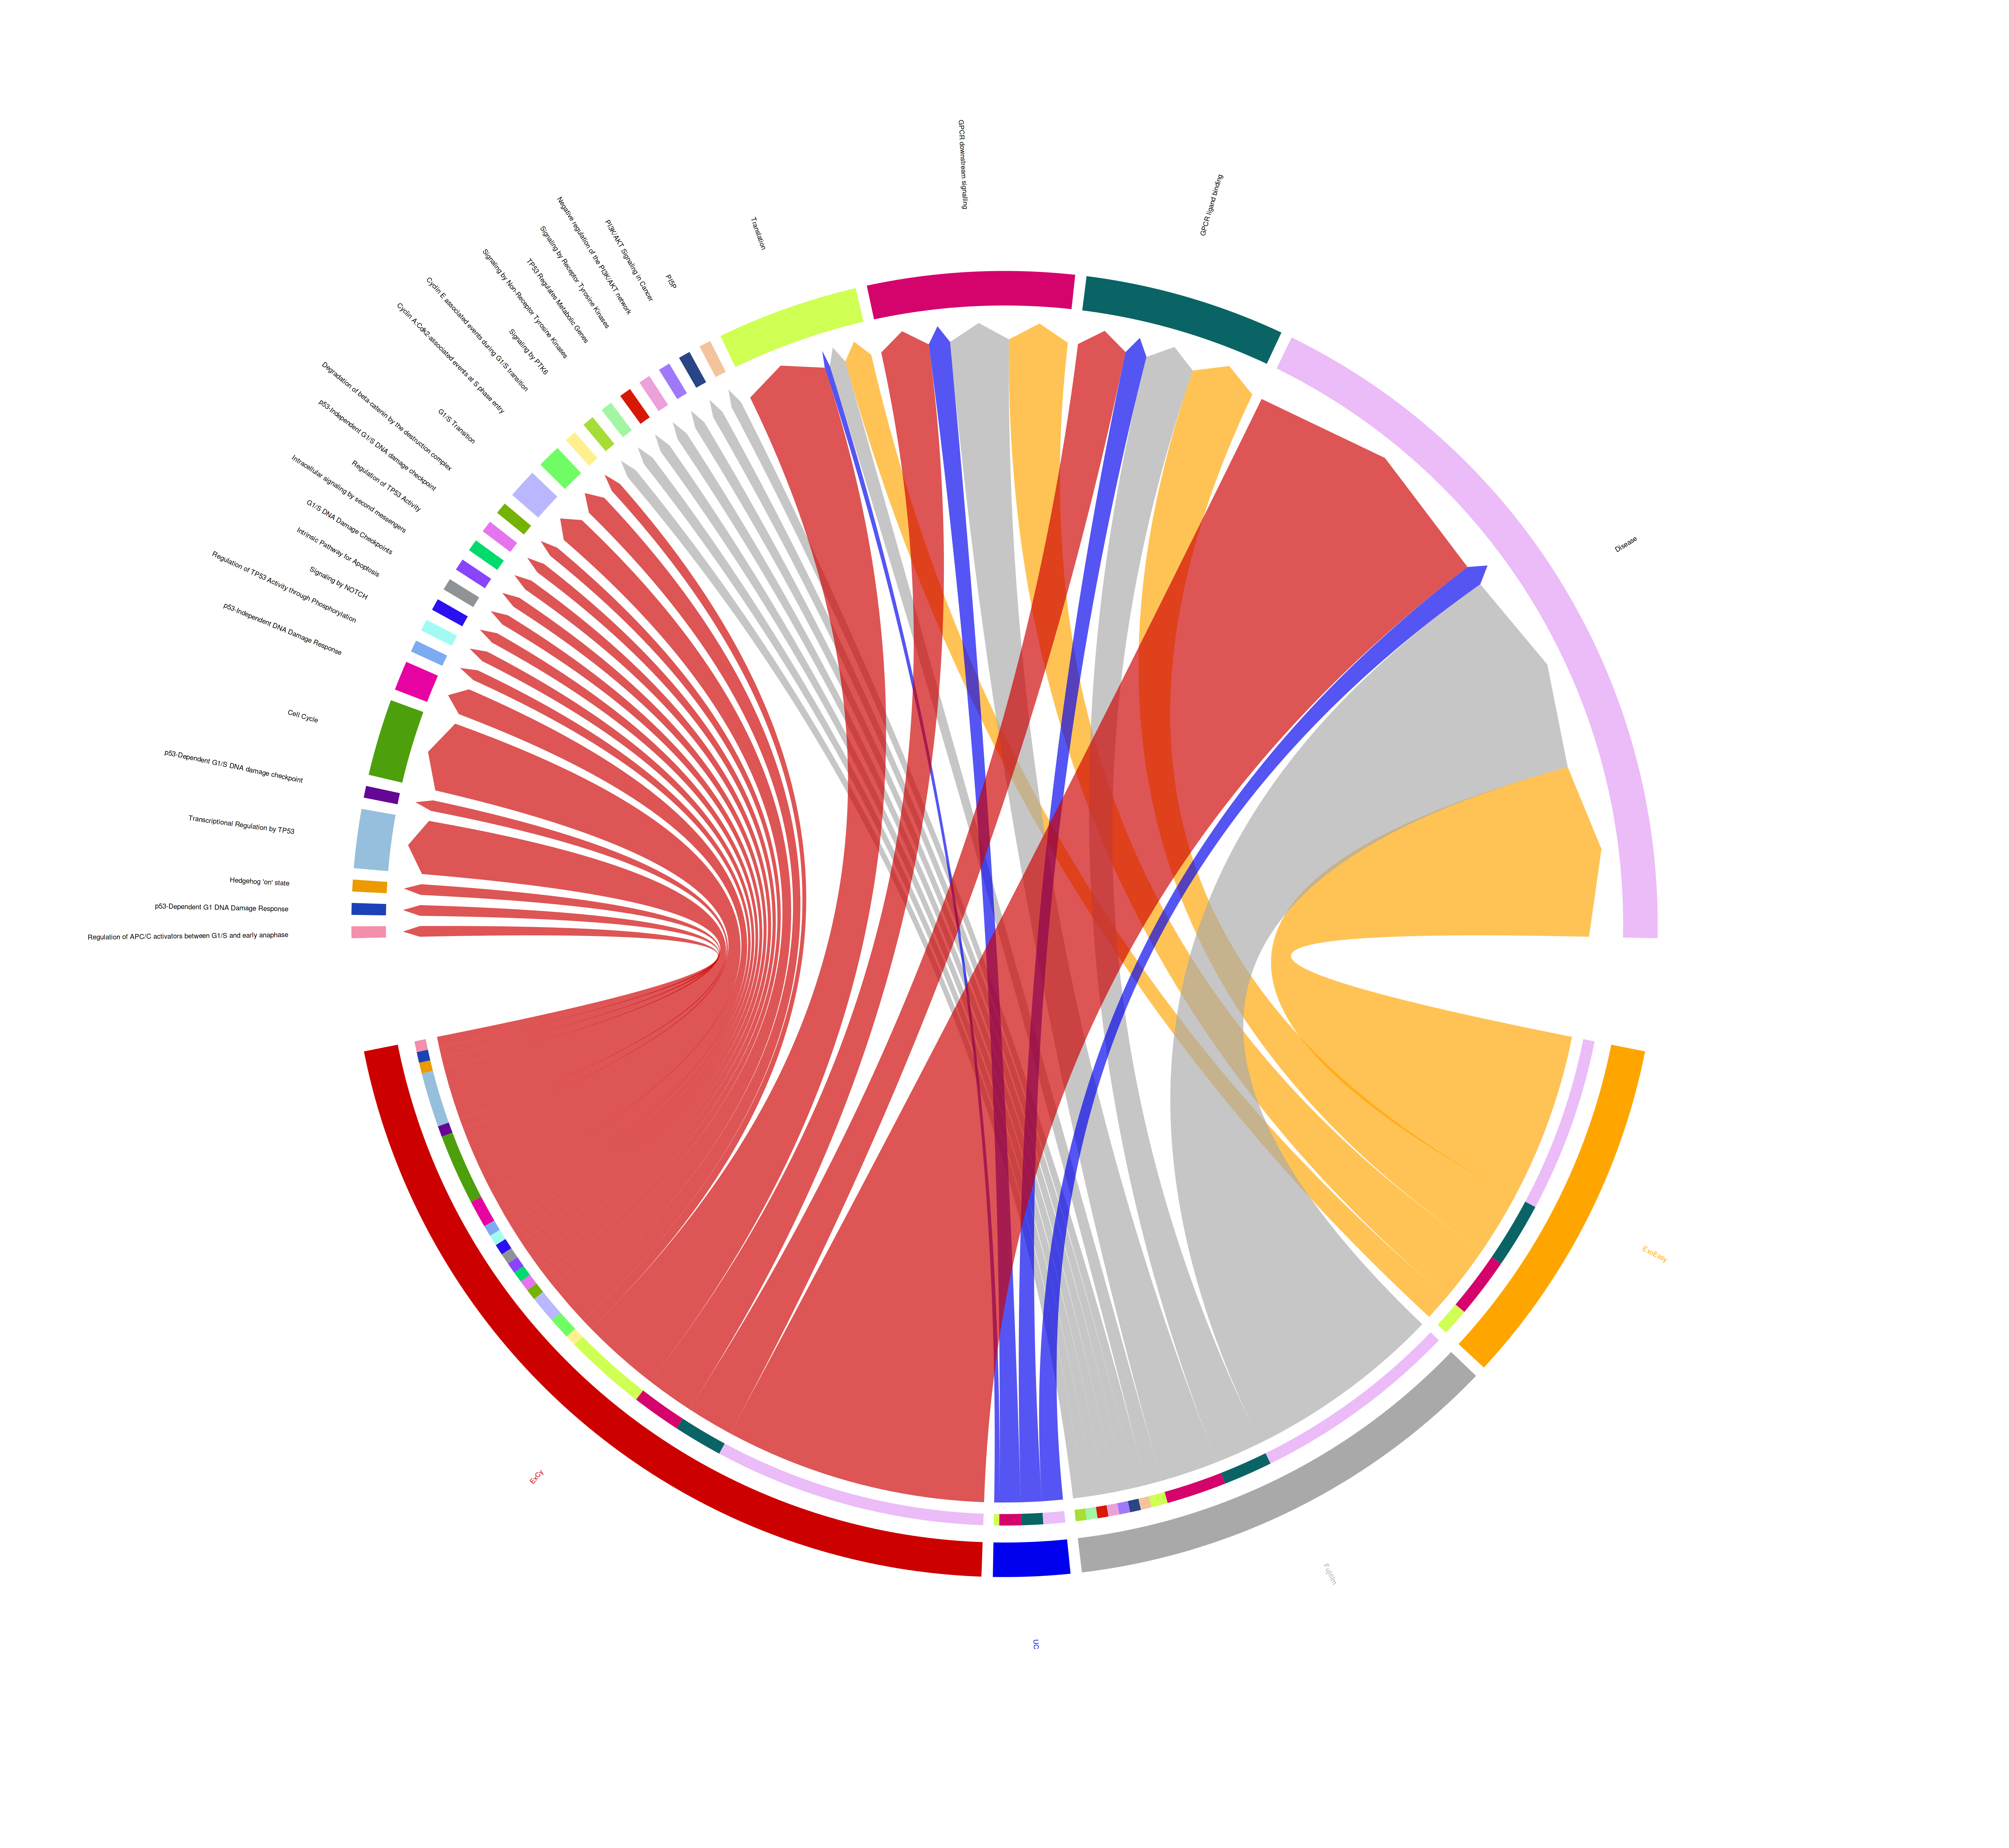

In [69]:
#Circos2 - Tumor
circos.clear()
options(repr.plot.width =50, repr.plot.height =46)
chord <- read.csv("Chord_Cancer.csv")
chord_proc <- chord
rownames(chord_proc) <- chord[,5]
chord_proc <- chord_proc[,1:4]
grid.col = c(ExCy="red3", Fujifilm="darkgray", UC="blue2", ExoEasy="orange")



chordDiagram(as.matrix(t(chord_proc)), annotationTrack = "grid", 
             preAllocateTracks = list(list(track.width = 0.65, track.height=0.2)), 
             grid.col = grid.col,
             transparency=0.33,
             directional = 1, 
             direction.type = c("diffHeight", "arrows"), 
             link.arr.type = "big.arrow",)

circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), 
              ylim[1] + cm_h(2),
              sector.name, 
              facing = "clockwise",
              niceFacing = TRUE, 
              adj = c(0, 0.2),
              cex = 0,
              col=grid.col[sector.name],
              font = 1)
  circos.axis(major.tick=FALSE, lwd=0, labels=FALSE)
}, bg.border = NA)



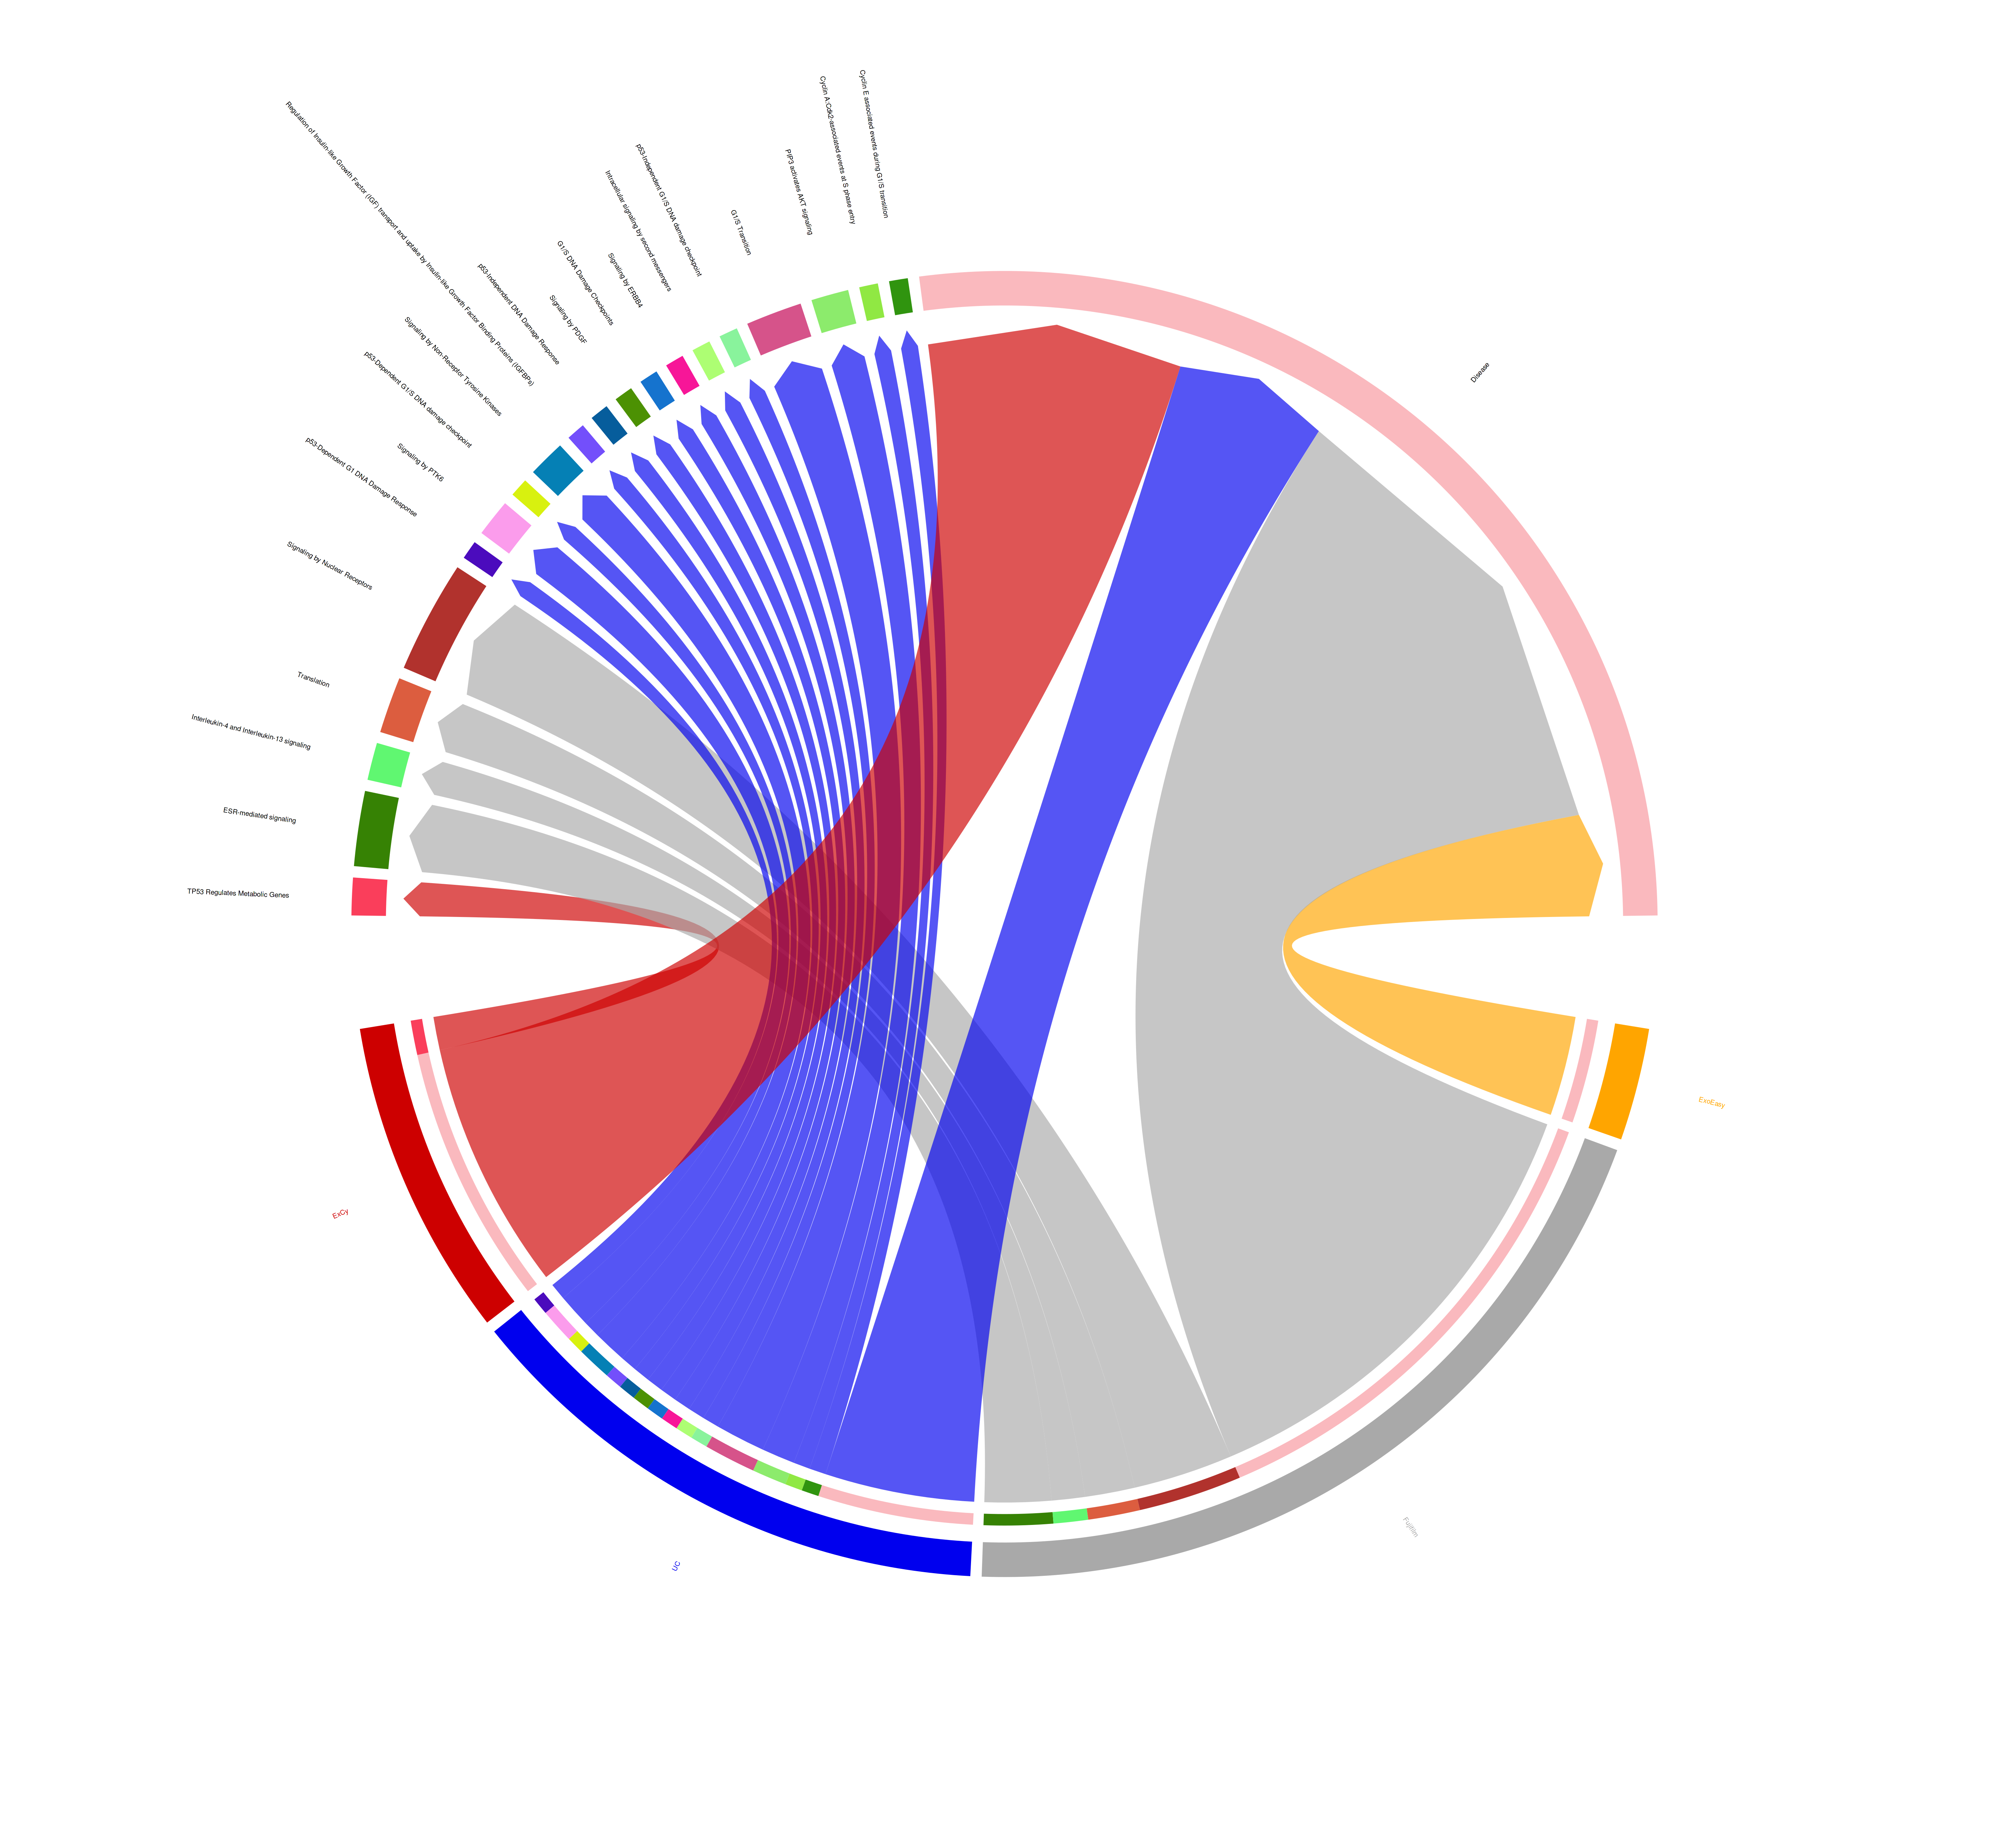

In [68]:
# Healthy 
#Circos2 - Tumor
circos.clear()
options(repr.plot.width =50, repr.plot.height =46)
chord <- read.csv("Chord_Cancer_In_Healthy.csv")
chord_proc <- chord
rownames(chord_proc) <- chord[,5]
chord_proc <- chord_proc[,1:4]
grid.col = c(ExCy="red3", Fujifilm="darkgray", UC="blue2", ExoEasy="orange")



chordDiagram(as.matrix(t(chord_proc)), annotationTrack = "grid", 
             preAllocateTracks = list(list(track.width = 0.65, track.height=0.2)), 
             grid.col = grid.col,
             transparency=0.33,
             directional = 1, 
             direction.type = c("diffHeight", "arrows"), 
             link.arr.type = "big.arrow",)

circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), 
              ylim[1] + cm_h(2),
              sector.name, 
              facing = "clockwise",
              niceFacing = TRUE, 
              adj = c(0.0, 0.2),
              cex = 0,
              col=grid.col[sector.name],
              font = 1)
  circos.axis(major.tick=FALSE, lwd=0, labels=FALSE)
}, bg.border = NA)
